In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.svm import SVC
%matplotlib inline
from sklearn.model_selection import train_test_split
import pandas  as pd
from   keras.models import Sequential
from   keras.layers import Dense             # i.e.fully connected
import tensorflow as tf

In [2]:
df = pd.read_csv("/content/training.csv", on_bad_lines='skip', skiprows=1)
df = df.sample(frac=1) #shuffle
df.sample(5)
df.shape

(36573, 11)

In [3]:
df.drop_duplicates(keep= 'first', inplace=True) #eliminarea dublurilor liniilor
print('Null values in dataset are',len(df[df.isnull().any(1)]))
df.shape

Null values in dataset are 0


(36573, 11)

In [4]:
X = df.drop(['Pozitie', 'Severitate def','Severitate inc.'], axis = 1)
y = df[['Pozitie']].values

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [6]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [7]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(units = 8, kernel_initializer='normal', activation = 'LeakyReLU'))

# Adding the first hidden layer
model.add(Dense(units = 16, kernel_initializer='normal', activation = 'LeakyReLU'))

#Adding second hidden layer
model.add(Dense(units = 16, kernel_initializer='normal', activation = 'LeakyReLU'))
model.add(Dense(units = 16, kernel_initializer='normal', activation = 'LeakyReLU'))

# Adding the output layer
model.add(Dense(units = 1, kernel_initializer='normal', activation = 'linear'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = root_mean_squared_error)# metrics = ['accuracy'])

In [8]:
history = model.fit(X_train, y_train, batch_size = 64, epochs = 1000, verbose = 2)

Epoch 1/1000
458/458 - 2s - loss: 0.3169 - 2s/epoch - 5ms/step
Epoch 2/1000
458/458 - 1s - loss: 0.2635 - 1s/epoch - 2ms/step
Epoch 3/1000
458/458 - 1s - loss: 0.1888 - 1s/epoch - 3ms/step
Epoch 4/1000
458/458 - 1s - loss: 0.1748 - 1s/epoch - 2ms/step
Epoch 5/1000
458/458 - 1s - loss: 0.1665 - 824ms/epoch - 2ms/step
Epoch 6/1000
458/458 - 1s - loss: 0.1618 - 846ms/epoch - 2ms/step
Epoch 7/1000
458/458 - 1s - loss: 0.1575 - 993ms/epoch - 2ms/step
Epoch 8/1000
458/458 - 1s - loss: 0.1536 - 1s/epoch - 2ms/step
Epoch 9/1000
458/458 - 1s - loss: 0.1478 - 1s/epoch - 2ms/step
Epoch 10/1000
458/458 - 1s - loss: 0.1407 - 841ms/epoch - 2ms/step
Epoch 11/1000
458/458 - 1s - loss: 0.1350 - 1s/epoch - 2ms/step
Epoch 12/1000
458/458 - 1s - loss: 0.1344 - 968ms/epoch - 2ms/step
Epoch 13/1000
458/458 - 1s - loss: 0.1319 - 1s/epoch - 3ms/step
Epoch 14/1000
458/458 - 1s - loss: 0.1279 - 1s/epoch - 2ms/step
Epoch 15/1000
458/458 - 1s - loss: 0.1261 - 1s/epoch - 3ms/step
Epoch 16/1000
458/458 - 1s - loss:

In [9]:
import pickle
with open('/trainHistoryDict', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [10]:
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('model mean absolute error')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train data', 'validation data'], loc='upper right')
# plt.savefig('/loss.pdf')  
# plt.show()

In [11]:

tabel4_lucrare = pd.read_csv("/content/date_tabel11_v2.csv", on_bad_lines='skip')
tabel4_lucrare.head(10)

,Pozitie,Severitate def,Mod 1,Mod 2,Mod 3,Mod 4,Mod 5,Mod 6,Mod 7,Mod 8
0,0.098,0.003346,0.020610,0.007828,0.001629,0.000031,0.002070,0.005964,0.009762,0.011873
1,0.310,0.003346,0.001795,0.000660,0.002334,0.000600,0.000542,0.002654,0.001223,0.000146
2,0.569,0.003346,0.002382,0.017252,0.005019,0.009109,0.011488,0.002556,0.016603,0.000017
3,0.126,0.003346,0.023458,0.005550,0.000064,0.002581,0.008901,0.014021,0.014610,0.010491
4,0.759,0.003346,0.000288,0.005461,0.017336,0.017272,0.004422,0.000996,0.012234,0.016377


In [12]:
X = tabel4_lucrare.drop(['Pozitie','Severitate def'], axis = 1)
y = tabel4_lucrare[['Pozitie']].values

In [13]:
X = np.asarray(X).astype('float32')

In [14]:
prediction = model.predict(X)

print("prediction shape:", prediction)

prediction shape: [[0.08389989]
 [0.28743926]
 [0.56759655]
 [0.10858312]
 [0.7529304 ]]


In [15]:
train_error =  np.abs(y - prediction)
mean_error = np.mean(train_error)
min_error = np.min(train_error)
max_error = np.max(train_error)
std_error = np.std(train_error)
print("std_error: ",std_error)
print("mean_error: ",mean_error)
print("min_error: ",min_error)
print("max_error: ",max_error)

std_error:  0.0076453646761674475
mean_error:  0.012310155534744256
min_error:  0.0014034452438353995
max_error:  0.0225607430934906


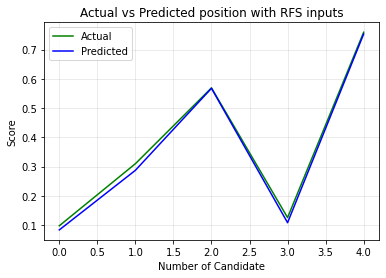

In [20]:
#Visualising the Acutal and predicted Result
plt.plot(y, color = 'green', label = 'Actual')
plt.plot(prediction, color = 'blue', label = 'Predicted')
plt.grid(alpha = 0.3)
plt.xlabel('Number of Candidate')
plt.ylabel('Score')
plt.title('Actual vs Predicted position with RFS inputs')
plt.legend()
plt.savefig('tabel11.pdf') 
plt.show()

In [17]:
#tabel4_lucrare.head(10)
for i in range (0,len(y)):
  print('Val pozitiei din tabel{0} si val pozitiei prezisa de model {1}'.format(y[i], prediction[i]))



Val pozitiei din tabel[0.098] si val pozitiei prezisa de model [0.08389989]
Val pozitiei din tabel[0.31] si val pozitiei prezisa de model [0.28743926]
Val pozitiei din tabel[0.569] si val pozitiei prezisa de model [0.56759655]
Val pozitiei din tabel[0.126] si val pozitiei prezisa de model [0.10858312]
Val pozitiei din tabel[0.759] si val pozitiei prezisa de model [0.7529304]


In [18]:
y

array([[0.098],
       [0.31 ],
       [0.569],
       [0.126],
       [0.759]])